In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import seaborn as sns

#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('universal_tagset')
#nltk.download('vader_lexicon')

In [5]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
tokenizer.model_max_length = 512

## Tools

In [6]:
def nltkmodel(df):
    res = {}
    sia = SentimentIntensityAnalyzer()
    for i, row in df.iterrows():
        text = row['review']
        myid = i
        res[myid] = sia.polarity_scores(str(text))
    df_res = pd.DataFrame(res).T
    return df_res.merge(df,left_index=True,right_index=True)

In [7]:
def robertaone(example):
    encoded_text = tokenizer(example, return_tensors='pt',padding='max_length', truncation=True, max_length=514)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

def robertamodel(df):
    res = {}
    for i, row in df.iterrows():
        text = row['review']
        myid = i
        res[myid] = robertaone(text)
    df_res = pd.DataFrame(res).T
    return df_res.merge(df,left_index=True,right_index=True)


# Android

In [8]:
android_df = pd.read_csv("kayak.csv")
android_df
res = nltkmodel(android_df)
res = res[['compound','year','rating','review']]

In [9]:
res
text = res['review'][0]
tokens = nltk.word_tokenize(text)
tagged = nltk.pos_tag(tokens, tagset='universal')
tagged

[('It', 'PRON'),
 ("'s", 'VERB'),
 ('really', 'ADV'),
 ('mind-blowing', 'ADJ'),
 ('how', 'ADV'),
 ('low', 'ADJ'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('prices', 'NOUN'),
 ('the', 'DET'),
 ('flights', 'NOUN'),
 ('are', 'VERB'),
 ('for', 'ADP'),
 ('this', 'DET'),
 ('app', 'NOUN'),
 ('.', '.'),
 ('What', 'PRON'),
 ("'s", 'VERB'),
 ('even', 'ADV'),
 ('more', 'ADV'),
 ('amazing', 'ADJ'),
 ('is', 'VERB'),
 ('the', 'DET'),
 ('best', 'ADJ'),
 ('deals', 'NOUN'),
 ('seem', 'VERB'),
 ('to', 'PRT'),
 ('all', 'DET'),
 ('come', 'VERB'),
 ('from', 'ADP'),
 ('this', 'DET'),
 ('app', 'NOUN'),
 ('.', '.'),
 ('I', 'PRON'),
 ("'ve", 'VERB'),
 ('tried', 'VERB'),
 ('other', 'ADJ'),
 ('flight', 'NOUN'),
 ('websites', 'NOUN'),
 ('and', 'CONJ'),
 ('I', 'PRON'),
 ('stumbled', 'VERB'),
 ('upon', 'ADP'),
 ('you', 'PRON'),
 ('all', 'DET'),
 (',', '.'),
 ('when', 'ADV'),
 ('I', 'PRON'),
 ('say', 'VERB'),
 ('absolute', 'ADJ'),
 ('best', 'ADJ'),
 ('prices', 'NOUN'),
 ('that', 'DET'),
 ("'s", 'VERB'),
 ('exactly', 'ADV'

In [10]:
df = res.dropna(subset=['review'])

In [11]:
df.query('rating == 1') \
    .sort_values('compound', ascending=False).values[0]

array([0.9371, 2023, 1,
       "Wow, I don't like leaving negative reviews. But I have to on this. I booked an airline ticket for international travel using the kayak app and I went directly through the kayak service. They use a third-party called Chatdeal. I now need to make some adjustments to my trip and there is literally no customer service . At the same time they have a special agreement where they lock us out of being able to receive help from the airline directly. Please, don't book through them, use Expedia, etc."],
      dtype=object)

In [16]:
kayak = pd.read_csv("kayak.csv")
skyskanner = pd.read_csv("skyskanner.csv")
df = kayak
df
df.dropna()

,year,rating,review
0,2023,5,It's really mind-blowing how low of the prices...
1,2023,4,I really like the kayak app.. it's great for f...
2,2023,2,The app no longer works for hotel searches. Fo...
3,2022,3,I find Kayak to have the most customizable fli...
4,2021,2,In the past the app has been pretty accurate w...
...,...,...,...
43638,2019,5,Wow spps
43639,2012,5,Exlant
43640,2012,5,:)
43641,2012,5,:-)


In [23]:
res = nltkmodel(df)

In [22]:
finalres = robertamodel(res)

KeyboardInterrupt: 

In [18]:
res = res[['compound','year','rating','review']]

In [19]:
res

,compound,year,rating,review
0,0.9285,2023,5,It's really mind-blowing how low of the prices...
1,-0.1796,2023,4,I really like the kayak app.. it's great for f...
2,-0.4215,2023,2,The app no longer works for hotel searches. Fo...
3,-0.1516,2022,3,I find Kayak to have the most customizable fli...
4,0.9091,2021,2,In the past the app has been pretty accurate w...
...,...,...,...,...
43648,0.0000,2014,4,NaN
43649,0.0000,2014,3,NaN
43650,0.0000,2014,1,NaN
43651,0.0000,2014,1,NaN


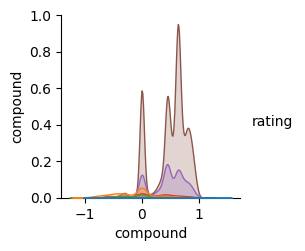

In [20]:
sns.pairplot(data=res,
             vars=['compound'],
            hue='rating',
            palette='tab10')
plt.show()

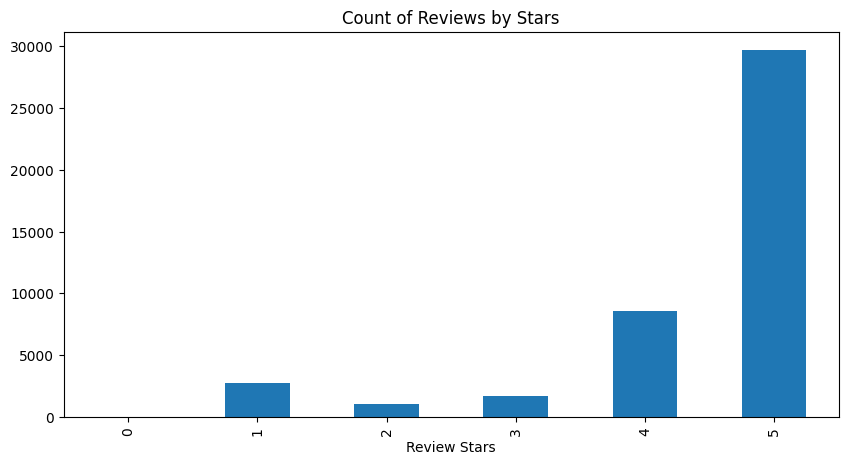

In [21]:
ax = res['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()